In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [19]:
input_path = pathlib.Path("/home/fberanek/Desktop/learning/my_articles/outputs")

In [20]:
keras_networks = list((input_path/"keras").glob("*"))
detectron2_networks = list((input_path/"detectron2").glob("*"))

In [74]:
final_df = pd.DataFrame([],columns=['Network','Metric', 'Clear', 'Transparent', 'Semi-Transparent', 'Opaque'])

list_of_datasets = ["all_files", "correct_files", "correct_clear_files", "correct_clear_strict_files"]
list_of_classes = ['Clear', 'Transparent', 'Semi-Transparent', 'Opaque']
list_of_networks = []

for network_path in (keras_networks + detectron2_networks):
    for training_data in list_of_datasets:
        network_name = network_path.name
        dataset_name = training_data
        network_results = pd.read_csv(network_path/ training_data / "evaluations" / "stats" / "relative_stats.csv")
        network_results.rename(columns={"Unnamed: 0":"Metric"}, inplace=True)
        network_results.insert(0,"Dataset",value=dataset_name)
        network_results.insert(0,"Network",value=network_name)
        final_df = pd.concat([final_df,network_results], axis=0)
    list_of_networks.append(network_name)


/tmp/ipykernel_14785/2708610040.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df,network_results], axis=0)


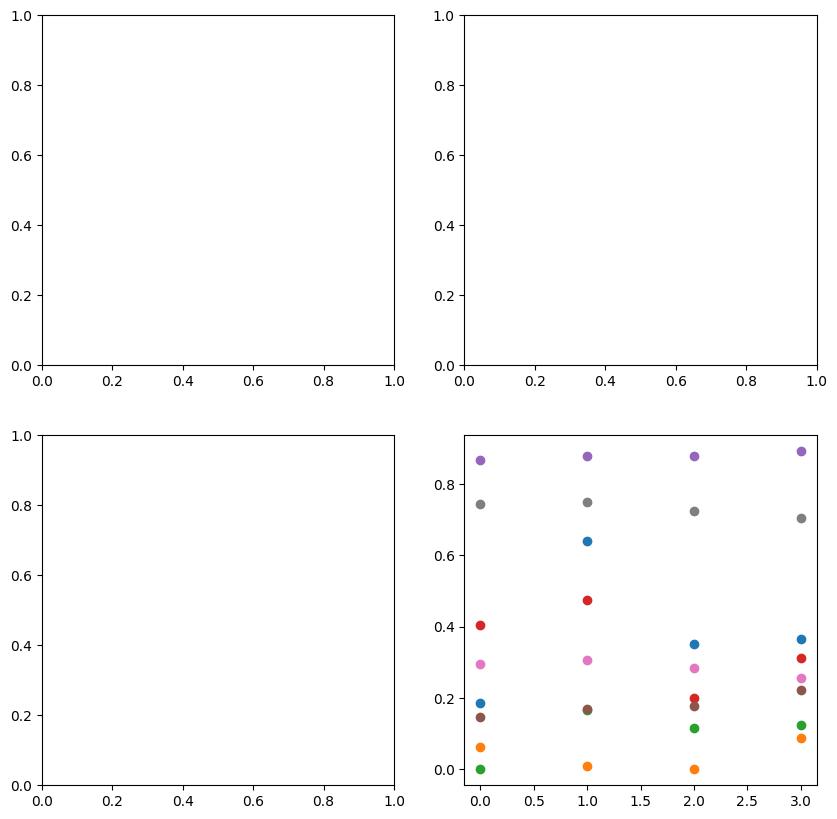

In [81]:
fig, axs = plt.subplots(2,2,figsize = (10,10))
tmp_df = final_df[final_df["Metric"]=="IoU"].copy()
for network_name in list_of_networks:
    network_df = tmp_df[tmp_df["Network"]==network_name]
    for class_id, class_name in enumerate(list_of_classes): 
        plt.scatter(range(4),network_df[class_name])

In [76]:
class_name

'Clear'

In [80]:
network_df[class_name]

4    0.866325
4    0.879297
4    0.877993
4    0.892057
Name: Clear, dtype: float64